# Footprint overlay on spatial index

### Quick links:
1. [NDVI plot focused on flux tower footprint](#first-bullet)

2. [Plot: Zoomed out picture](#second-bullet)
* [Full cali region plot](#third-bullet)
* [Plotting a selected scene](#fourth-bullet)
* [Subplot multiple days](#fifth-bullet)


# 1. Full  Zoomed-out San Fran Region <a class="anchor" id="third-bullet"></a>
Can grab subsets of this data if you'd like to zoom into specific regions to find better coordinates of interest.

In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading Data
%cd "data"
testdata = pd.read_csv('RR_ndvi_cali.csv',delimiter = ',',header = 1)
%cd ..

ndvi = testdata['NDVI']
time = testdata['time']
lat = testdata['latitude']
lon = testdata['longitude']
id = testdata['id']

# Distance between pixels along longitude/latitude
dlon = abs(lon[10]-lon[9])
dlat = abs(lon[10]-lon[9])

# Plot colour scheme.
clr = 'PiYG'
# clr = 'YlGn'

# Plotting
fig, ax = plt.subplots(1,1,figsize=(10,10))
plot = ax.scatter( lon, lat , c=ndvi, 
            cmap = clr,marker = 's', s= 40)

# Formatting ticklabels as lon/lat values
ax.ticklabel_format(useOffset=False)

# Colour bar
cbar = fig.colorbar(plot)
cbar.set_label('NDVI')

# Figure format
ax.set_ylim([min(lat)-.00025,max(lat)+.00025])
ax.set_xlim([min(lon)-dlon,max(lon)+dlon])
ax.set_ylabel('Latitude',fontsize = 12)
ax.set_xlabel('Longitude',fontsize = 12)
# ax.set_title(f'Rush Ranch/Cali Region on {date}',fontsize = 22)
ax.set_facecolor('xkcd:light grey')

# Plotting Footprint coordinates
Point, Point2 = [-122.026358,38.200556], [-122.027373,38.200054]
ax.scatter(Point[0],Point[1],c = 'r', marker = '*',s=60)
ax.scatter(Point2[0],Point[1],c = 'b', marker = '*',s=60)

/Users/darianng/Documents/YEAR 3/Summer - Micrometeorology Lab/Code/data
/Users/darianng/Documents/YEAR 3/Summer - Micrometeorology Lab/Code


# 3. Subplotting Multiple Days <a class="anchor" id="fifth-bullet"></a>
- Works only when displaying more than 2 scenes
- Read up-down, then left-right

##### Variables to change:
- __sceneNumber__: Number of scenes displayed
- **startDate**: The date to start compiling your list from.
- __clr__: Colour-map  colour scheme

In [2]:
# Loading Data
%cd "data"
# testdata = pd.read_csv('bb1_spatialndvi.csv',delimiter = ',',header = 1)
testdata = pd.read_csv('ndwi_output.csv',delimiter = ',',header = 1)
%cd ..

ndvi = testdata['NDWI']
time = testdata['time']
lat = testdata['latitude']
lon = testdata['longitude']
id = testdata['id']


# Length of dataset
N = len(id)
# Footprint coordinates
Point, Point2 = [-122.9849,49.1293], [-122.027373,38.200054]

UniqueID_unsorted = np.unique(id)
UniqueID = np.array([1]*(len(UniqueID_unsorted)))
for i in range(len(UniqueID_unsorted)):
    number = int(UniqueID_unsorted[i][12:])
    UniqueID[i] = (number)
UniqueID.sort()
UniqueID
print(f'\nAvailable landsat scenes: \n{UniqueID}')

/Users/darianng/Documents/YEAR 3/Summer - Micrometeorology Lab/Code/data
/Users/darianng/Documents/YEAR 3/Summer - Micrometeorology Lab/Code

Available landsat scenes: 
[20170202 20170525 20170626 20170705 20170712 20170728 20170822 20170829
 20170914 20170923 20171009 20180309 20180426 20180505 20180512 20180715
 20180724 20180731 20180809 20180816 20180917 20180926 20181019 20181028
 20181206]


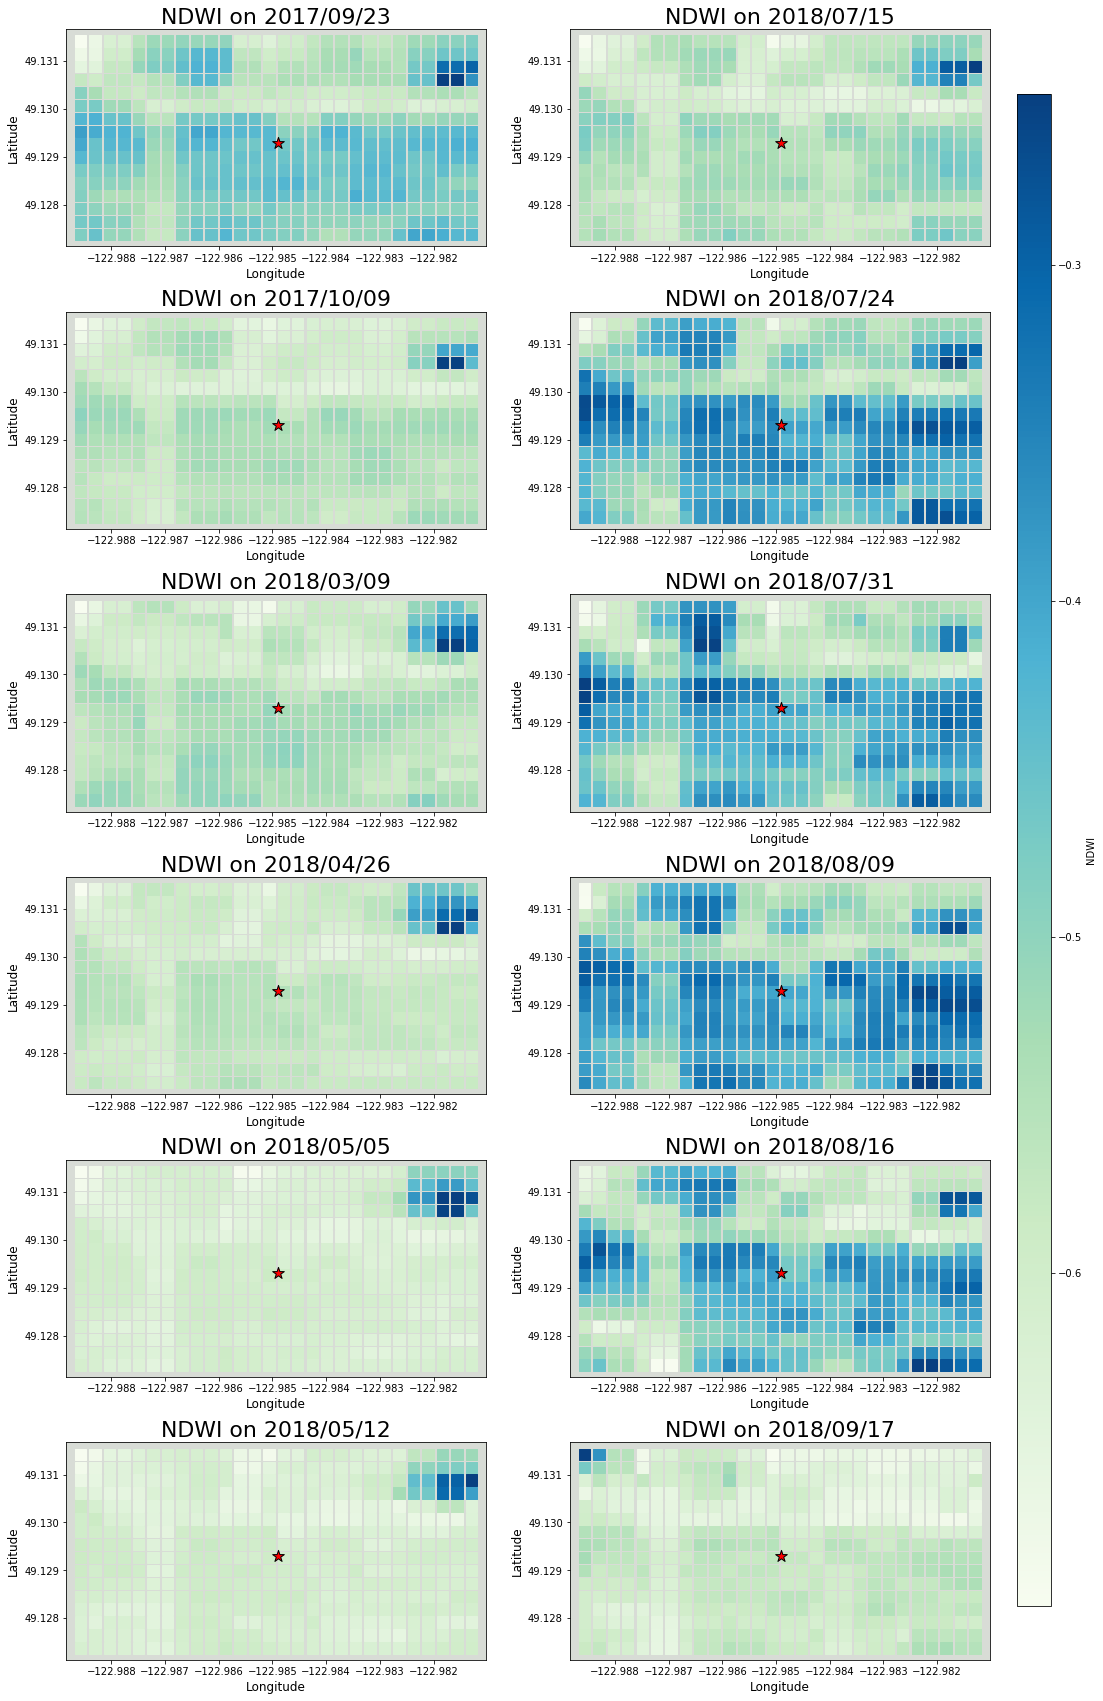

In [3]:
idx = 0 #Used to set default starting date


# --------------------------------------------------------------

# number of scenes you want. 
sceneNumber = 12

# Choose starting date. 
startDate = 20170923 # Comment out to default to first date.

# Plot colour scheme.
# clr = 'PRGn'
clr = 'GnBu'
# clr = 'YlGn'


# --------------------------------------------------------------

# Starting date index
# idx = np.where(UniqueID=='LC08_044034_'+str(startDate))[0][0]
# idx = np.where(UniqueID=='LC08_047026_'+str(startDate))[0][0]
idx = np.where(UniqueID==startDate)[0][0]

# Creating your list of scenes. Will grab scenes in order of date.
sceneList = []
for kk in range(idx,idx+sceneNumber):
    sceneList.append(str(UniqueID[kk]))
    
# # ---Uncomment this to manually input dates---
# sceneList = [20180225,20180329,20190414,20180601,20180703] 



# Finding best subplot shape given number of scenes.
if sceneNumber < 7:
    plotShape = (19,15)
elif sceneNumber < 9:
    plotShape = (19,20)
elif sceneNumber < 12:
    plotShape = (19,25)
elif sceneNumber < 15:
    plotShape = (19,30) 
else:
    plotShape = (19,40)


# subplot dimensions
dimensions = len(sceneList)
dim1 = 2
dim2 = int(np.ceil(dimensions/2))


counter = 0 # tracks scene number

fig, ax = plt.subplots(dim2,dim1,figsize=plotShape)

for i in range(dim1): # Columns
    for j in range(dim2): # Rows
        if counter < len(sceneList):
        
            scene = sceneList[counter] # current date

            # formatting date as yyy/mm/dd (used for subplot title)
            date = str(scene)[0:4]+'/'+str(scene)[4:6]+'/'+str(scene)[6:] 

            # Initializing list to store data from current scene.
            LonData = []
            LatData = []
            ndviData = []
            
            # Storing data
            for ii in range(N):
                if id[ii][12:] == str(scene): # Finding entries at current date
                    LonData.append(lon[ii])
                    LatData.append(lat[ii])
                    ndviData.append(ndvi[ii])

            # Plotting
            plot = ax[j,i].scatter( LonData, LatData , c=ndviData, 
                        cmap = clr ,marker = 's', s= 130)

            # Formatting ticklabels as lon/lat values
            ax[j,i].ticklabel_format(useOffset=False)

            # Figure format
            ax[j,i].set_ylim([min(lat)-.00025,max(lat)+.00025])
            ax[j,i].set_xlim([min(lon)-dlon,max(lon)+dlon])
            ax[j,i].set_ylabel('Latitude',fontsize = 12)
            ax[j,i].set_xlabel('Longitude',fontsize = 12)
            ax[j,i].set_title(f'NDWI on {date}',fontsize = 22)
            ax[j,i].set_facecolor('xkcd:light grey')

            # Plotting Footprint coordinates
#             ax[j,i].scatter(Point[0],Point[1],c = 'r', edgecolors = 'k',marker = '*',s=150)
#             ax[j,i].scatter(Point2[0],Point[1],c = 'orange', edgecolors = 'k', marker = '*',s=150)
            Point3 = [-122.114,37.61562]
            ax[j,i].scatter(Point[0],Point[1],c = 'red', edgecolors = 'k', marker = '*',s=150)
            
            counter +=1

# Figure adjustments
fig.subplots_adjust(hspace=0.3,right = 0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.025, 0.7])
cbar = fig.colorbar(plot, cax=cbar_ax)
cbar.set_label('NDWI')



# 2. Selecting  single scene from csv with multiple days <a class="anchor" id="fourth-bullet"></a>
- First cell below prints list of unique landsat scenes. Read available dates from the last set of digits in the landsat IDs  <br>
- Assign the date you want to variable: __"scene"__  in the second cell below.

In [4]:
print(UniqueID)

[20170202 20170525 20170626 20170705 20170712 20170728 20170822 20170829
 20170914 20170923 20171009 20180309 20180426 20180505 20180512 20180715
 20180724 20180731 20180809 20180816 20180917 20180926 20181019 20181028
 20181206]


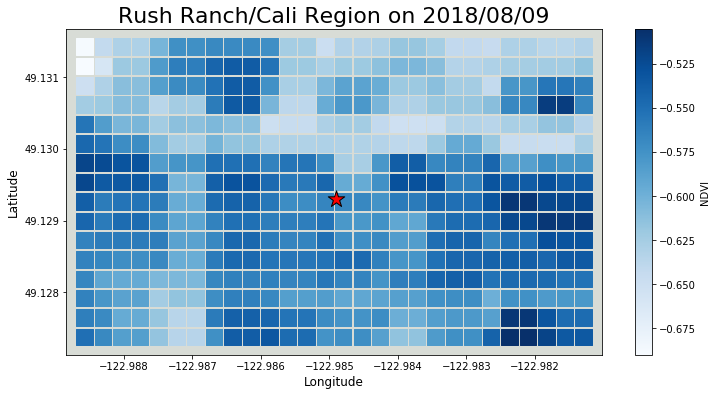

In [5]:
# ------------------------------------------

# Select Landsat image by date
scene = 20180809

#-------------------------------------------

# Turning date into yyy/mm/dd format for plot title
date = str(scene)[0:4]+'/'+str(scene)[4:6]+'/'+str(scene)[6:]

# Length of dataset
N = len(id)

# Initializing list to store data from chosen scene.
LonData = []
LatData = []
ndviData = []

# Storing data
for ii in range(N):
    if id[ii][12:] == str(scene): # Finding entries that match chosen date
        LonData.append(lon[ii])
        LatData.append(lat[ii])
        ndviData.append(ndvi[ii])
        
# Plot colour scheme.
clr = 'Blues'
# clr = 'YlGn'
        
# Plotting
fig, ax = plt.subplots(1,1,figsize=(12,6))
plot = ax.scatter( LonData, LatData , c=ndviData, 
            cmap = clr ,marker = 's', s= 270)

# Formatting ticklabels as lon/lat values
ax.ticklabel_format(useOffset=False)

# Colour bar
cbar = fig.colorbar(plot)
cbar.set_label('NDVI')

# Figure format
ax.set_ylim([min(lat)-.00025,max(lat)+.00025])
ax.set_xlim([min(lon)-dlon,max(lon)+dlon])
ax.set_ylabel('Latitude',fontsize = 12)
ax.set_xlabel('Longitude',fontsize = 12)
ax.set_title(f'Rush Ranch/Cali Region on {date}',fontsize = 22)
ax.set_facecolor('xkcd:light grey')

# Plotting Footprint coordinates
ax.scatter(Point[0],Point[1],c = 'r', edgecolors = 'k',marker = '*',s=300)



### Calculating flux footprint (via Kljun's model)

In [6]:
% cd FFP_Python
from FFPoutput import FFPplot, FFPloop
% cd ../
xr_now, yr_now, FCH4_stat = FFPloop('eddypro_BB_shortened.csv','2018-08-',['09'])

/Users/darianng/Documents/YEAR 3/Summer - Micrometeorology Lab/Code/FFP_Python
/Users/darianng/Documents/YEAR 3/Summer - Micrometeorology Lab/Code
Available dates are: ['09']

Alert(0017):
 Only one value of zm passed. Using it for all footprints.
 Execution continues.

Alert(0013):
 Using z0, ignoring umean if passed.
 Execution continues.

Calculating footprint  1  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  3  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) 

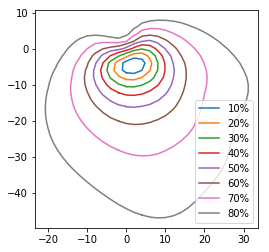

In [7]:
# export_file, fig = FFPplot(xr,yr,'2018-08-',['09','10'],FCH4_stat)
plt.figure(figsize=(4,4))
for i in range(len(xr_now[0])):
    plt.plot(xr_now[0][i],yr_now[0][i],label=f'{10+10*i}%')
plt.legend()

In [8]:
xr = xr_now[0][7] # Looking at 80% footprint area
yr = yr_now[0][7]

"""
Converting metres into lat/lon degrees at 49˚ latitude
1˚ latitude ≈ 111,000 m
1˚ longitude ≈ 85,000 m

from https://www.thoughtco.com/degree-of-latitude-and-longitude-distance-4070616

"""
# Functions turning metres into degrees lat/lon
def m_to_lat(metre):
    degree = metre*(1/111000)
    return degree
def m_to_lon(metre):
    degree = metre*(1/85000)
    return degree

# Turning xr and yr (contour coordinates) into lat/lon
xr_deg = np.zeros(len(xr))
yr_deg = np.zeros(len(xr))
for i in range(len(xr)):
    # Matching xr/yr onto flux tower coordinates
    xr_deg[i] = m_to_lon(xr[i]) + Point[0]
    yr_deg[i] = m_to_lat(yr[i]) + Point[1]

# distance of 1 pixel
lat_1px = m_to_lat(30)
lon_1px = m_to_lon(30)

### Overlaid plot

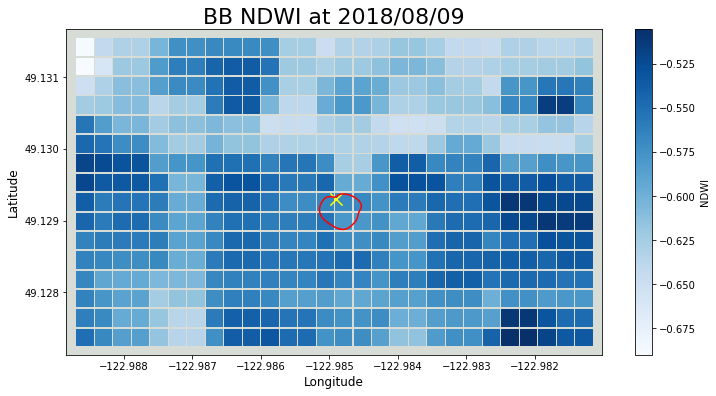

In [9]:
# Overlaid plot
fig, ax = plt.subplots(1,1,figsize=(12,6))
plot = ax.scatter( LonData, LatData , c=ndviData, 
            cmap = clr ,marker = 's', s= 270)
# Formatting ticklabels as lon/lat values
ax.ticklabel_format(useOffset=False)

# Colour bar
cbar = fig.colorbar(plot)
cbar.set_label('NDWI')

# Figure format
ax.set_ylim([min(lat)-.00025,max(lat)+.00025])
ax.set_xlim([min(lon)-dlon,max(lon)+dlon])
ax.set_ylabel('Latitude',fontsize = 12)
ax.set_xlabel('Longitude',fontsize = 12)
ax.set_title(f'BB NDWI at {date}',fontsize = 22)
ax.set_facecolor('xkcd:light grey')
# Plotting Footprint coordinates
ax.scatter(Point[0],Point[1],c = 'yellow', edgecolors = 'k',marker = 'x',s=150)

# Flux footprint
ax.plot(xr_deg,yr_deg,'r')

### Isolating spatial index pixels


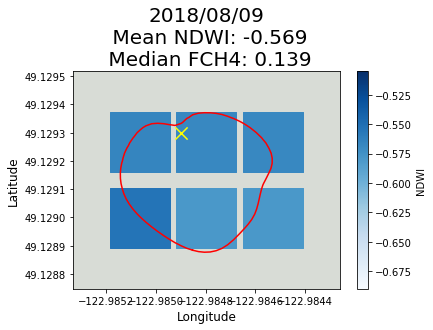

In [10]:
lon_iso = []
lat_iso = []
ndvi_iso = []

lonMax = max(xr_deg) + lon_1px/2
latMax = max(yr_deg) + lat_1px/2
lonMin = min(xr_deg) - lon_1px/2
latMin = min(yr_deg) - lat_1px/2

# lonMax = max(xr_deg)
# latMax = max(yr_deg)
# lonMin = min(xr_deg)
# latMin = min(yr_deg)

for i in range(len(LonData)):
    if LonData[i] < lonMax and LonData[i] > lonMin and LatData[i] < latMax and LatData[i] > latMin:
        lon_iso.append(LonData[i])
        lat_iso.append(LatData[i])
        ndvi_iso.append(ndviData[i])
        
# Plotting
fig, ax = plt.subplots(1,1,figsize=(6,4))
plot = ax.scatter( lon_iso, lat_iso , c=ndvi_iso, 
            cmap = clr ,marker = 's', s= 1200*3, vmin = min(ndviData), vmax = max(ndviData))
# Formatting ticklabels as lon/lat values
ax.ticklabel_format(useOffset=False)
# Colour bar
cbar = fig.colorbar(plot)
cbar.set_label('NDWI')
# Figure format
ax.set_ylim([min(lat_iso)-.00025,max(lat_iso)+.00025])
ax.set_xlim([min(lon_iso)-dlon,max(lon_iso)+dlon])
ax.set_ylabel('Latitude',fontsize = 12)
ax.set_xlabel('Longitude',fontsize = 12)
ax.set_title(f'{date}\n Mean NDWI: {np.round(np.nanmean(ndvi_iso),3)}\n Median FCH4: {np.round(FCH4_stat[1][0],3)}',fontsize = 20)
ax.set_facecolor('xkcd:light grey')

ax.scatter(Point[0],Point[1],c = 'yellow', edgecolors = 'k',marker = 'x',s=150)
ax.plot(xr_deg,yr_deg,'r')

# Multiplots for Footprint-isolated spatial index

In [11]:
UniqueID

array([20170202, 20170525, 20170626, 20170705, 20170712, 20170728,
       20170822, 20170829, 20170914, 20170923, 20171009, 20180309,
       20180426, 20180505, 20180512, 20180715, 20180724, 20180731,
       20180809, 20180816, 20180917, 20180926, 20181019, 20181028,
       20181206])

In [12]:
# number of scenes you want. 
sceneNumber = 11
# Choose starting date. 
startDate = 20180309 
clr = 'GnBu'

idx = np.where(UniqueID==startDate)[0][0]

# Creating your list of scenes. Will grab scenes in order of date.
sceneList = [] # For spatial index
dateList = [] # For FFP
for kk in range(idx,idx+sceneNumber):
    sceneList.append(str(UniqueID[kk]))
#     dateList.append(str(UniqueID[kk])[:4]+'-'+str(UniqueID[kk])[4:6]+'-'+str(UniqueID[kk])[6:])
    dateList.append(str(UniqueID[kk])[6:])
    

xr_multi, yr_multi, FCH4_multi = FFPloop('eddypro_BB_shortened.csv','2018-08-',dateList)
print(dateList)

Available dates are: ['09', '26', '05', '12', '15', '24', '31', '09', '16', '17', '26']

Alert(0017):
 Only one value of zm passed. Using it for all footprints.
 Execution continues.

Alert(0013):
 Using z0, ignoring umean if passed.
 Execution continues.

Calculating footprint  1  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  3  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is inva

Calculating footprint  23  of  48
Calculating footprint  25  of  48
Calculating footprint  27  of  48
Calculating footprint  29  of  48
Calculating footprint  31  of  48
Calculating footprint  33  of  48
Calculating footprint  35  of  48
Calculating footprint  37  of  48
Calculating footprint  39  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  41  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  43  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.


Alert(0017):
 Only one value of zm passed. Using it for all footprints.
 Execution continues.

Alert(0013):
 Using z0, ignoring umean if passed.
 Execution continues.

Calculating footprint  1  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  3  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  5  of  48


Calculating footprint  13  of  48
Calculating footprint  15  of  48
Calculating footprint  17  of  48
Calculating footprint  19  of  48
Calculating footprint  21  of  48

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  23  of  48
Calculating footprint  25  of  48
Calculating footprint  27  of  48
Calculating footprint  29  of  48
Calculating footprint  31  of  48
Calculating footprint  33  of  48
Calculating footprint  35  of  48
Calculating footprint  37  of  48
Calculating footprint  39  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one requir

Calculating footprint  17  of  48
Calculating footprint  19  of  48
Calculating footprint  21  of  48
Calculating footprint  23  of  48
Calculating footprint  25  of  48
Calculating footprint  27  of  48
Calculating footprint  29  of  48
Calculating footprint  31  of  48
Calculating footprint  33  of  48
Calculating footprint  35  of  48
Calculating footprint  37  of  48
Calculating footprint  39  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  41  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  43  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprin

Calculating footprint  19  of  48
Calculating footprint  21  of  48
Calculating footprint  23  of  48
Calculating footprint  25  of  48
Calculating footprint  27  of  48
Calculating footprint  29  of  48
Calculating footprint  31  of  48
Calculating footprint  33  of  48
Calculating footprint  35  of  48
Calculating footprint  37  of  48
Calculating footprint  39  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  41  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  43  of  48

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.

Error(00

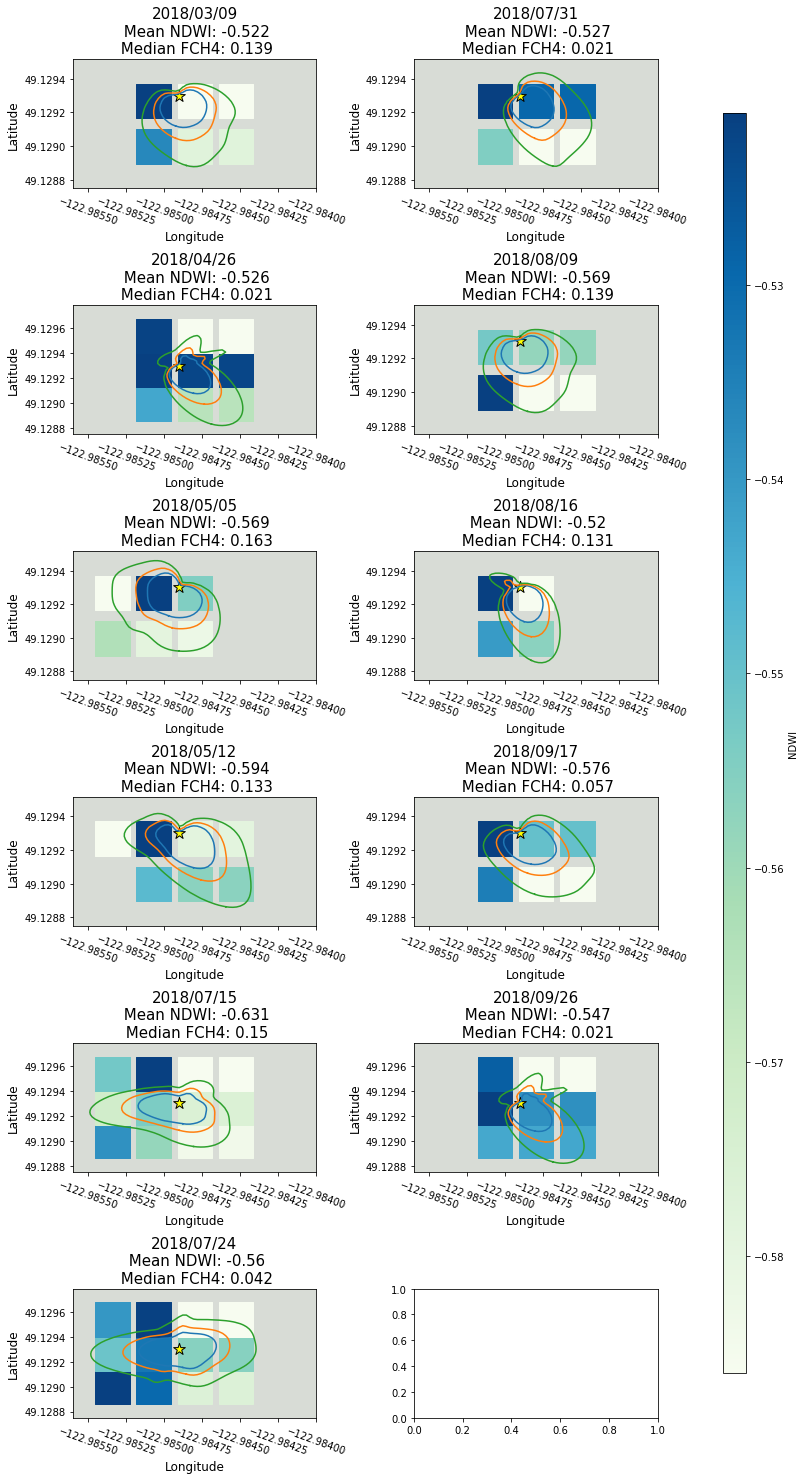

In [19]:
# Finding best subplot shape given number of scenes.
if sceneNumber < 7:
    plotShape = (13,15)
elif sceneNumber < 9:
    plotShape = (13,20)
elif sceneNumber < 12:
    plotShape = (13,25)
elif sceneNumber < 15:
    plotShape = (13,30) 
else:
    plotShape = (19,40)
# subplot dimensions
dimensions = len(sceneList)
dim1 = 2
dim2 = int(np.ceil(dimensions/2))

counter = 0 # tracks scene number
fig, ax = plt.subplots(dim2,dim1,figsize=plotShape)

stat = {'NDWI':[], 'FCH4':[], 'date':[]}

for i in range(dim1): # Columns
    for j in range(dim2): # Rows
        if counter < len(sceneList):
        
            scene = sceneList[counter] # current date

            # formatting date as yyy/mm/dd (used for subplot title)
            date = str(scene)[0:4]+'/'+str(scene)[4:6]+'/'+str(scene)[6:] 
            
            # FFP
            xr = xr_multi[counter][7]
            yr = yr_multi[counter][7]
            xr_plot = [] # Multi contour arrays for plotting
            yr_plot = [] # Multi contour arrays for plotting
            
            xr_deg = np.zeros(len(xr))
            yr_deg = np.zeros(len(yr))
            xr_deg_top = []
            xr_deg_bot = []
            
            for ii in range(len(xr)):
                # Matching xr/yr onto flux tower coordinates
                xr_deg[ii] = m_to_lon(xr[ii]) + Point[0]
                yr_deg[ii] = m_to_lat(yr[ii]) + Point[1]
                
            for d2 in range(3):
                holding_x = []
                holding_y = []
                for d3 in range(len(xr_multi[counter][5+d2])):
                    holding_x.append(m_to_lon(xr_multi[counter][5+d2][d3]) + Point[0])
                    holding_y.append(m_to_lat(yr_multi[counter][5+d2][d3]) + Point[1])
                xr_plot.append(holding_x)
                yr_plot.append(holding_y)
                
            # Plotting FFP
            for d4 in range(3):
                ax[j,i].plot(xr_plot[d4],yr_plot[d4])

            # Initializing list to store data from current scene.
            LonData = []
            LatData = []
            ndviData = []
                            
            # Coordinate limits      
            lonMax = max(xr_deg) + lon_1px/2
            latMax = max(yr_deg) + lat_1px/4
            lonMin = min(xr_deg) - lon_1px/2
            latMin = min(yr_deg) - lat_1px/4
            
            # Dividing verticality of footprint
            midpoint_y = (max(yr_deg)-min(yr_deg))/2 + min(yr_deg)
            
            # Finding top lonmax and bottom lonmax
            for i2 in range(len(yr)):
                if yr_deg[i2] >= midpoint_y:
                    xr_deg_top.append(xr_deg[i2])
                else:
                    xr_deg_bot.append(xr_deg[i2])
            lonmax_top = max(xr_deg_top) + lon_1px/4
            lonmin_top = min(xr_deg_top) - lon_1px/4
            lonmax_bot = max(xr_deg_bot) + lon_1px/4
            lonmin_bot = min(xr_deg_bot) - lon_1px/4
            
            # Storing data
            for jj in range(N):
                if lat[jj] >= midpoint_y: # Top half boundaries
                    if id[jj][12:] == str(scene) and lon[jj] < lonmax_top and lon[jj] > lonmin_top and lat[jj] < latMax and lat[jj] > latMin:
                        LonData.append(lon[jj])
                        LatData.append(lat[jj])
                        ndviData.append(ndvi[jj])
                elif lat[jj] < midpoint_y: # Bottom half boundaries
                    if id[jj][12:] == str(scene) and lon[jj] < lonmax_bot and lon[jj] > lonmin_bot and lat[jj] < latMax and lat[jj] > latMin:
                        LonData.append(lon[jj])
                        LatData.append(lat[jj])
                        ndviData.append(ndvi[jj])


            # Plotting
            plot = ax[j,i].scatter( LonData, LatData , c=ndviData, 
                        cmap = clr ,marker = 's', s= 1200)

            # Formatting ticklabels as lon/lat values
            ax[j,i].ticklabel_format(useOffset=False)

            # Figure format
            ax[j,i].set_ylim([min(LatData)-.00025,max(LatData)+.00025])
#             ax[j,i].set_xlim([min(LonData)-dlon,max(LonData)+dlon])
            ax[j,i].set_xlim([-122.9856,-122.9840])
            ax[j,i].set_ylabel('Latitude',fontsize = 12)
            ax[j,i].set_xlabel('Longitude',fontsize = 12)
            ax[j,i].set_title(f'{date}\n Mean NDWI: {np.round(np.nanmean(ndviData),3)}\n Median FCH4: {np.round(FCH4_multi[1][counter],3)}',fontsize = 15)
            ax[j,i].set_facecolor('xkcd:light grey')
            ax[j,i].tick_params(axis='x', labelrotation=340)
            

            # Plotting Footprint coordinates
            Point3 = [-122.114,37.61562]
            ax[j,i].scatter(Point[0],Point[1],c = 'yellow', edgecolors = 'k', marker = '*',s=150)
            
            stat['NDWI'].append(np.nanmean(ndviData))
            stat['FCH4'].append(FCH4_multi[1][counter])
            stat['date'].append(date)
            
            counter +=1
            
            

# Figure adjustments
fig.subplots_adjust(hspace=0.9, wspace = 0.4,right = 0.75)
cbar_ax = fig.add_axes([0.82, 0.15, 0.025, 0.7])
cbar = fig.colorbar(plot, cax=cbar_ax)
cbar.set_label('NDWI')



Text(-0.63,0.075,'r value: -0.411, p value: 0.209')

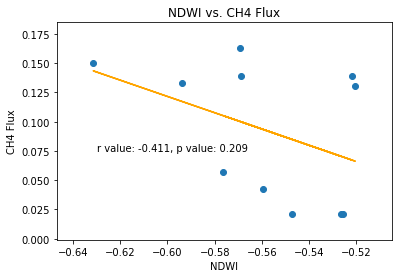

In [14]:
from scipy import stats
plt.scatter(stat['NDWI'],stat['FCH4'])
plt.title('NDWI vs. CH4 Flux')
plt.xlabel('NDWI')
plt.ylabel('CH4 Flux')
m, b = np.polyfit(stat['NDWI'],stat['FCH4'],1)
yfit = m*np.array(stat['NDWI'])+b
plt.plot(stat['NDWI'],yfit,'orange')
r_val, p_val = stats.pearsonr(stat['NDWI'], stat['FCH4'])
plt.text(-0.63,0.075,f'r value: {np.round(r_val,3)}, p value: {np.round(p_val,3)}')


Error(0009):
 ustar (friction velocity) must be >=0.1.


(-40.597677559582074, 107.45871975718214)

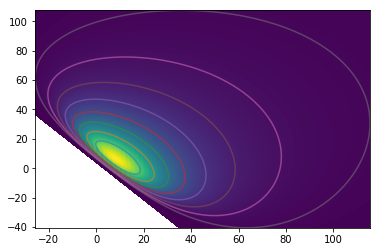

In [24]:
import calc_footprint_FFP as myfootprint
ffpdata = pd.read_csv('eddypro_BB_shortened.csv',delimiter = ',',header = 0)


index = 4000
ws = ffpdata['wind_speed'][index]
wd = ffpdata['wind_dir'][index]
L = ffpdata['L'][index]
ustar = ffpdata['u*'][index]
sigmav = ffpdata['sigma_v'][index]
zm = 1.8
z0 = None
bl_height = 4000

FFP = myfootprint.FFP(zm=zm, z0=z0,umean=ws, h=bl_height,ol=L,sigmav=sigmav,ustar=ustar,wind_dir = wd)
plt.pcolormesh(FFP['x_2d'],FFP['y_2d'],FFP['f_2d'])
for i in range(8):
    plt.plot(FFP['xr'][i],FFP['yr'][i],alpha = 0.5)
plt.xlim([min(FFP['xr'][7]),max(FFP['xr'][7])])
plt.ylim([min(FFP['yr'][7]),max(FFP['yr'][7])])

In [27]:
f2d = FFP['f_2d']
total = []
for pp in range(len(f2d)):
    total.append(np.sum(f2d[pp]))
print(f'total sum of f_2d: {np.sum(total)}')

total sum of f_2d: 5.204697947688589


sum of f_ci: 2.2263626674831403


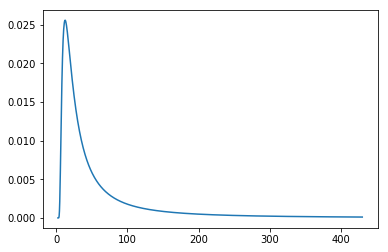

In [23]:
plt.plot(FFP['x_ci'],FFP['f_ci'])
print(f'sum of f_ci: {np.sum(FFP["f_ci"])}')